<a href="https://colab.research.google.com/github/statrav/pages/blob/main/Ch1_3_Linked_List%2C_Stack%2C_and_Queue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Array for List

[List]

1. List의 필요성 : 구조화된 형태를 사용했을 때, 효율적인 저장공간을 확보하고 활용할 수 있음 (선형 구조)

[ADT : Abstract Data Types]

1. Data Structure
 - 데이터 저장 (생성 / 제거)
 - 데이터 검색
 
2. ADT
 - 정의 : Data Structure의 다양한 행동(기능)들이 어떻게 구현되는 지 추상적으로 표현한 타입
 - 저장된 데이터 & 데이터를 활용하는 operations

[Array]

1. 동일한 data를 index를 활용하여 저장하거나 접근할 수 있는 방식
   → Array는 index가 필요

2. Array를 통해서 List를 생성

3. index를 navigate하여 element를 찾을 수 있음

4. '?'라는 데이터가 List x에 있는지 없는지를 알기 위해서는 len(x)만큼을 비교해보아야 함 (List의 길이를 아는 법 : len(x))

In [ ]:
# Insert Example

A = ['a', 'b', 'c', 'e', 'f', 'g']
B = list(range(7))

InsertIdx = 3
Correct = 'd'

for idx in range(0,InsertIdx):
    B[idx] = A[idx]

In [ ]:
B

['a', 'b', 'c', 3, 4, 5, 6]

In [ ]:
B[InsertIdx] = Correct
for idx in range(InsertIdx, len(A)):
    B[idx+1] = A[idx]

In [ ]:
B

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [ ]:
#Delete Example

A = ['a', 'b', 'c', 'd', 'e', 'f']
B = list(range(5))

DeleteIdx = 2

for idx in range(0, DeleteIdx):
    B[idx] = A[idx]


In [ ]:
B

['a', 'b', 2, 3, 4]

In [ ]:
for idx in range(DeleteIdx+1, len(A)):
    B[idx-1] = A[idx]

In [ ]:
B

['a', 'b', 'd', 'e', 'f']

[Array의 문제점들]

1. Array 내에 원하는 위치에 원하는 값을 더하거나 빼기 위해서는 Array 전체를 건드려야 함
→ 이 문제를 Linked List로 해결 가능

# 02. Linked List

[Singly Linked List]

- 구성 : nodes, references
- node
 (1) 다음 node에 대한 reference를 저장하는 변수
 (2) 어떠한 값이 저장될 것인지에 대한 reference를 저장하는 변수
 (3) special node : Head and Tail

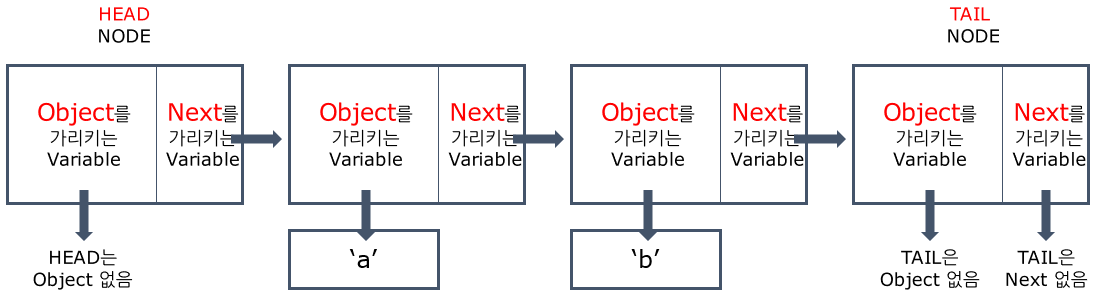

In [ ]:
class Node:
    nodeNext = None
    nodePrey = ''
    objValue = ''
    binHead = False
    binTail = False
    
    def __init__(self, objValue = '', nodeNext = None, binHead = False, binTail = False):
        self.nodeNext = nodeNext
        self.objValue = objValue
        self.binHead = binHead
        self.binTail = binTail
    
    def getValue(self):
        return self.objValue

    def setValue(self, objValue):
        self.objValue = objValue

    def getNext(self):
        return self.nodeNext

    def setNext(self, nodeNext):
        self.nodeNext = nodeNext

    def isHead(self):
        return self.binHead

    def isTail(self):
        return self.binTail


In [ ]:
node1 = Node(objValue = 'a')
nodeTail = Node(binTail = True)
nodeHead = Node(binHead = True, nodeNext = node1)

#### Insert Example

- NodePrev.Next = NodeNew
- NodeNew.Next = NodeNext
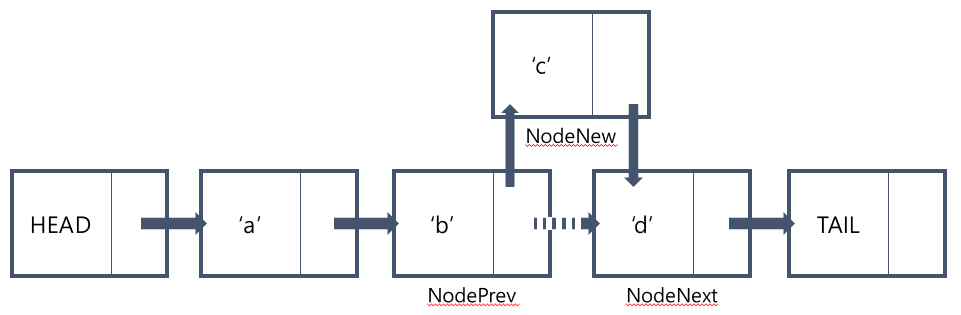

#### Delete Example

- NodeRemove.Next = NodeNext
- NodeNext = NodePrev.Next.Next

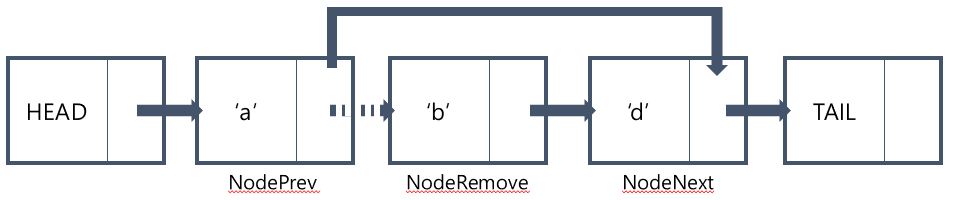

In [ ]:
class SinglyLindkedList:
    nodeHead = ''
    nodeTail =''
    size = 0
    
    def __init__(self):
        self.nodeTail = Node(binTail=True)
        self.nodeHead = Node(binHead = True, nodeNext=self.nodeTail)
        
    def insertAt(self, objInsert, idxInsert):
        nodeNew = Node(objValue = objInsert)
        nodePrev = self.get(idxInsert - 1)
        nodeNext = nodePrev.getNext()
        nodePrev.setNext(nodeNew)
        nodeNew.setNext(nodeNext)
        self.size = self.size + 1
        
    def removeAt(self, idxRemove):
        nodePrev = self.get(idxRemove - 1)
        nodeRemove = nodePrev.getNext()
        nodeNext = nodeRemove.getNext()
        nodePrev.setNext(nodeNext)
        self.size = self.size - 1
        
    def get(self, idxRetrieve):
        nodeReturn = self.nodeHead
        for itr in range(idxRetrieve + 1):
            nodeReturn = nodeReturn.getNext()
        return nodeReturn
    
    def printStatus(self):
        nodeCurrent = self.nodeHead
        while nodeCurrent.getNext().isTail() == False:
            nodeCurrent = nodeCurrent.getNext()
            print(nodeCurrent.getValue(), end= " ")
        print("")
        
        def getSize(self):
            return self.size

In [ ]:
list1 = SinglyLindkedList()

In [ ]:
list1

In [ ]:
list1.insertAt('a',0)
list1.insertAt('b',1)
list1.insertAt('c',2)

list1.printStatus()

a b c 


In [ ]:
list1.removeAt(1)

list1.printStatus()

a c 


# 03. Stack

[Stack의 구조]

- 선형으로 연결되어 있으며, 빠져나가는 구멍이 1개인 Stack (출구가 1개임)
- 오로지 첫 번째 node에 대해서만 관여를 함 (Top)
- Top을 통해서만 data를 insert와 remove가 이루어짐
- Last-In-First-Out (LIFO) 매커니즘 : 가장 먼저 들어간 것이 제일 나중에 나오고, 가장 늦게 들어간 것이 제일 먼저 나옴


[Stack Operation]

- list : search, insert, remove
- stack : top만 insert, remove → push, pop
    - push : linked list의 첫번째에 instance를 insert
    - pop : linked list의 첫번째 instance를 remove

In [ ]:
class Stack(object):
    lstInstance = SinglyLindkedList()
    def pop(self):
        return self.lstInstance.removeAt(0)
    def push(self, value):
        self.lstInstance.insertAt(value, 0)

# 04. Queue

[Queue의 구조]

- first instance : the front instance
- last instance : the rear instance
- 중간 순서에서는 insert나 remove가 될 수 없음
- First-In-First-Out (FIFO) : 선입선출법 (먼저 들어간 것이 먼저 나옴)

[Queue Operation]

- list : search, insert, remove
- stack : top만 insert, remove → push, pop
    - push : linked list의 첫번째에 instance를 insert
    - pop : linked list의 첫번째 instance를 remove
- queue : 첫번째가 remove, 마지막이 insert
    - Enqueue : 마지막 위치에 element를 insert
    - Dequeue : 첫 번째 위치에 element를 remove함

In [ ]:
class Queue(object):
    IstInstance = SinglyLindkedList()
    def dequeue(self):
        return self.IstInstance.removeAt(0)
    def enqueue(self, value):
        self.IstInstance.insertAt(value, self.IstInstance.getSize())